In [1]:
from stock_methods import get_data_with_labels
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


2012-01-01
2012-06-21
2012-12-04
2013-05-16
2013-10-17
2014-03-28
2014-09-11
2015-02-26
2015-08-06
2016-01-27
2016-07-08
2016-12-01
2017-03-31
2017-07-20
2017-11-02
2018-02-27
2018-06-20
2018-09-28
2019-01-08
2019-04-22
2019-07-31
2019-11-08
2020-02-20
2020-05-18
2020-08-24
2020-12-01
2021-03-16


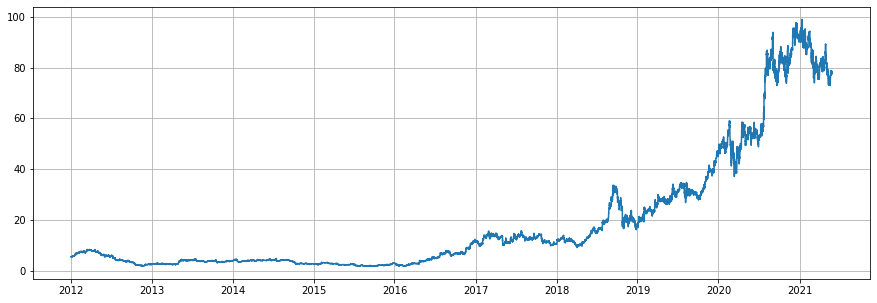

In [2]:
data_stock, barriers, bunch_of_features = get_data_with_labels("AMD")

In [3]:
data_stock

,volume,vw,open,close,high,low,number
2012-01-03 12:00:00,1100.0,5.5000,5.5000,5.50,5.500,5.50,6
2012-01-03 13:00:00,24951.0,5.5243,5.4800,5.54,5.540,5.48,29
2012-01-03 14:00:00,1359139.0,5.5509,5.4000,5.55,5.590,5.40,3115
2012-01-03 15:00:00,2822896.0,5.5226,5.5500,5.52,5.580,5.45,5652
2012-01-03 16:00:00,1179854.0,5.4913,5.5200,5.49,5.525,5.47,2604
...,...,...,...,...,...,...,...
2021-05-26 23:00:00,12408.0,78.0968,78.1300,78.09,78.130,78.05,103
2021-05-27 08:00:00,569.0,77.9308,77.9500,77.90,77.950,77.90,6
2021-05-27 10:00:00,1565.0,77.9646,77.9600,77.98,78.000,77.93,47
2021-05-27 11:00:00,26537.0,78.1600,78.0000,78.25,78.300,78.00,353


In [4]:
barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out
2012-01-03 14:00:00,1,5.55,2012-01-04 14:00:00,5.592915,5.507085,-1
2012-01-03 15:00:00,2,5.52,2012-01-04 15:00:00,5.590429,5.449571,0
2012-01-03 16:00:00,3,5.49,2012-01-04 16:00:00,5.556568,5.423432,0
2012-01-03 17:00:00,4,5.485,2012-01-04 17:00:00,5.541351,5.428649,0
2012-01-03 18:00:00,5,5.46,2012-01-04 18:00:00,5.512136,5.407864,0
...,...,...,...,...,...,...
2021-05-26 23:00:00,33152,78.09,NaN,78.524457,77.655543,None
2021-05-27 08:00:00,33153,77.9,NaN,78.32908,77.47092,None
2021-05-27 10:00:00,33154,77.98,NaN,78.395206,77.564794,None
2021-05-27 11:00:00,33155,78.25,NaN,78.678028,77.821972,None


In [5]:
bunch_of_features

,volume_1,price_spread_1,close_loc_1,close_change_1,volume_2,price_spread_2,close_loc_2,close_change_2,volume_3,price_spread_3,...,close_loc_20,close_change_20,volume_40,price_spread_40,close_loc_40,close_change_40,volume_60,price_spread_60,close_loc_60,close_change_60
2012-01-03 12:00:00,1100.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 13:00:00,24951.0,0.060,0.000000,0.04,26051.0,0.06,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 14:00:00,1359139.0,0.190,0.210526,0.01,1384090.0,0.19,0.210526,0.01,1385190.0,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 15:00:00,2822896.0,0.130,0.461538,-0.03,4182035.0,0.19,0.368421,-0.03,4206986.0,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 16:00:00,1179854.0,0.055,0.636364,-0.03,4002750.0,0.13,0.692308,-0.03,5361889.0,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26 23:00:00,12408.0,0.080,0.500000,-0.04,20194.0,0.13,0.692308,-0.04,64093.0,0.30,...,0.50,-0.04,90215837.0,1.9335,0.351694,-0.04,146214297.0,2.13,0.394366,-0.04
2021-05-27 08:00:00,569.0,0.050,1.000000,-0.19,12977.0,0.23,1.000000,-0.19,20763.0,0.28,...,0.69,-0.19,86094649.0,1.9335,0.449961,-0.19,146111644.0,2.13,0.483568,-0.19
2021-05-27 10:00:00,1565.0,0.070,0.285714,0.08,2134.0,0.10,0.200000,0.08,14542.0,0.23,...,0.61,0.08,83406484.0,1.9335,0.408585,0.08,138695601.0,1.97,0.401015,0.08
2021-05-27 11:00:00,26537.0,0.300,0.166667,0.27,28102.0,0.37,0.135135,0.27,28671.0,0.40,...,0.34,0.27,80348107.0,1.9335,0.268942,0.27,130023966.0,1.97,0.263959,0.27


In [6]:
dropna_barriers = barriers.dropna()
data = bunch_of_features[60:-13].assign(out=dropna_barriers[58:-2].out)
data.dropna(inplace=True)
out = data.out
out=out.astype('int')
data.drop('out', axis=1, inplace=True)
data

,volume_1,price_spread_1,close_loc_1,close_change_1,volume_2,price_spread_2,close_loc_2,close_change_2,volume_3,price_spread_3,...,close_loc_20,close_change_20,volume_40,price_spread_40,close_loc_40,close_change_40,volume_60,price_spread_60,close_loc_60,close_change_60
2012-01-10 13:00:00,15004.0,0.04,0.250000,0.0200,15304.0,0.04,0.250000,0.0200,16742.0,0.11,...,0.033333,0.0200,35540898.0,0.33,0.030303,0.0200,55633821.0,0.33,0.030303,0.0200
2012-01-10 14:00:00,1393823.0,0.10,0.450000,0.0250,1408827.0,0.10,0.450000,0.0250,1409127.0,0.10,...,0.125000,0.0250,36908307.0,0.39,0.115385,0.0250,57002693.0,0.39,0.115385,0.0250
2012-01-10 15:00:00,1349910.0,0.05,0.800000,-0.0050,2743733.0,0.10,0.500000,-0.0050,2758737.0,0.10,...,0.138889,-0.0050,38253617.0,0.39,0.128205,-0.0050,56993464.0,0.39,0.128205,-0.0050
2012-01-10 16:00:00,2673112.0,0.08,0.093750,0.0225,4023022.0,0.09,0.194444,0.0225,5416845.0,0.10,...,0.076389,0.0225,40925629.0,0.39,0.070513,0.0225,56843680.0,0.39,0.070513,0.0225
2012-01-10 17:00:00,1272293.0,0.04,0.000000,0.0275,3945405.0,0.10,0.000000,0.0275,5295315.0,0.10,...,0.000000,0.0275,42179422.0,0.39,0.000000,0.0275,56936119.0,0.39,0.000000,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26 10:00:00,1785.0,0.11,1.000000,-0.2100,3176.0,0.24,1.000000,-0.2100,3475.0,0.24,...,0.408585,-0.2100,84865368.0,1.97,0.401015,-0.2100,144620834.0,2.13,0.446009,-0.2100
2021-05-26 11:00:00,32517.0,0.23,0.565217,0.1200,34302.0,0.25,0.520000,0.1200,35693.0,0.25,...,0.346522,0.1200,78919308.0,1.97,0.340102,0.1200,138362885.0,2.13,0.389671,0.1200
2021-05-26 12:00:00,65436.0,0.25,0.480000,0.0100,97953.0,0.25,0.480000,0.0100,99738.0,0.25,...,0.341350,0.0100,78146611.0,1.97,0.335025,0.0100,134215925.0,2.13,0.384977,0.0100
2021-05-26 13:00:00,5170731.0,1.00,0.710000,-0.2300,5236167.0,1.00,0.710000,-0.2300,5268684.0,1.00,...,0.460305,-0.2300,83298714.0,1.97,0.451777,-0.2300,134260350.0,2.13,0.492958,-0.2300


In [7]:
y_test = out[-100:]
x_test = data[-100:]

y_train = out[:-100]
x_train = data[:-100]

In [8]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=20)

model.fit(x_train, y_train)
y_catboost_predictions = model.predict(x_test)

Learning rate set to 0.5
0:	learn: 1.0784116	total: 79.4ms	remaining: 1.51s
1:	learn: 1.0689954	total: 101ms	remaining: 908ms
2:	learn: 1.0621979	total: 124ms	remaining: 704ms
3:	learn: 1.0572197	total: 146ms	remaining: 582ms
4:	learn: 1.0534345	total: 165ms	remaining: 494ms
5:	learn: 1.0502224	total: 186ms	remaining: 433ms
6:	learn: 1.0466337	total: 210ms	remaining: 390ms
7:	learn: 1.0449738	total: 229ms	remaining: 344ms
8:	learn: 1.0434053	total: 250ms	remaining: 306ms
9:	learn: 1.0414488	total: 272ms	remaining: 272ms
10:	learn: 1.0388431	total: 295ms	remaining: 241ms
11:	learn: 1.0370096	total: 317ms	remaining: 211ms
12:	learn: 1.0350044	total: 339ms	remaining: 182ms
13:	learn: 1.0333403	total: 362ms	remaining: 155ms
14:	learn: 1.0313249	total: 382ms	remaining: 127ms
15:	learn: 1.0292318	total: 403ms	remaining: 101ms
16:	learn: 1.0257078	total: 427ms	remaining: 75.4ms
17:	learn: 1.0235792	total: 449ms	remaining: 49.8ms
18:	learn: 1.0206942	total: 470ms	remaining: 24.7ms
19:	learn: 1

In [9]:
catboost_conf_mx = confusion_matrix(y_test, y_catboost_predictions[:,0])
catboost_conf_mx

array([[ 7,  2, 14],
       [ 3, 16, 21],
       [ 6,  7, 24]])

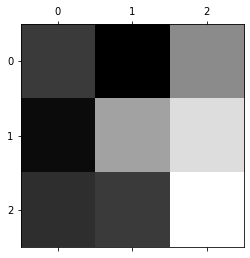

In [10]:
plt.matshow(catboost_conf_mx, cmap=plt.cm.gray)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample', criterion="entropy")
clf.fit(x_train, y_train)
y_RFC_predictions = clf.predict(x_test)


In [12]:
RFC_conf_mx = confusion_matrix(y_test, y_RFC_predictions)
RFC_conf_mx

array([[10,  4,  9],
       [ 5, 11, 24],
       [10,  3, 24]])

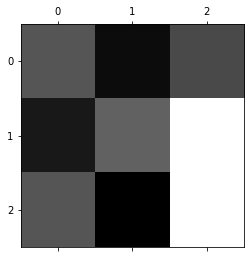

In [13]:
plt.matshow(RFC_conf_mx, cmap=plt.cm.gray)
plt.show()

In [14]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_xgboost_predictions = model.predict(x_test)

/Users/germanignatovich/Desktop/work/Диплом/env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
xgboost_conf_mx = confusion_matrix(y_test, y_xgboost_predictions)
xgboost_conf_mx

array([[ 8,  6,  9],
       [ 2, 14, 24],
       [13,  6, 18]])

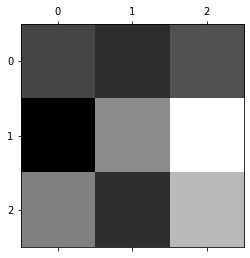

In [16]:
plt.matshow(xgboost_conf_mx, cmap=plt.cm.gray)
plt.show()

In [17]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=4000,
            learning_rate=0.03)
clf.fit(x_train, y_train)

y_lgb_predictions=clf.predict(x_test)

In [18]:
lgb_conf_mx = confusion_matrix(y_test, y_lgb_predictions)
lgb_conf_mx

array([[ 9,  1, 13],
       [12,  7, 21],
       [16,  6, 15]])

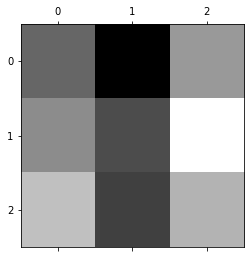

In [19]:
plt.matshow(lgb_conf_mx, cmap=plt.cm.gray)
plt.show()